# Ciudades de 15 minutos - resolución 9

Notebook para la prueba de la metodología de ciudades de 15 minutos. El acercamiento del Observatorio de Ciudades se basa en agrupar las amenidades en 4 ejes:
* Educación
* Servicios comunitarios
* Comercio
* Entretenimiento

Cada uno de estos ejes se subdivide en actividades específicas:

* Educación
    * Preescolar
    * Primaria
    * Secundaria
* Servicios comunitarios:
    * Centro de salud - lo traducimos como primer contacto a salud (que incluye farmacias con médicos)
    * Gobierno - oficinas de gobierno
    * Asistencia social - DIF
    * Cuidados - Guarderías
* Comercio:
    * Alimentos - sitios para la adquisición de alimentos
    * Comercio personal - peluquerías y venta de ropa
    * Farmacias
    * Hogar - Ferretería y tlapalería y artículos de limpieza
    * Complementario - sitios de comercio complementario como venta de ropa, calzado, muebles, lavandería, pintura y revistas
* Entretenimiento
    * Actividad física - espacios de recreación al aire libre como parques, canchas, unidades deportivas o parques naturales
    * Social - sitios de esparcimiento social como restaurantes, bares y cafés
    * Cultural - espacios de recreación cultural como museos o cines

Para calcular si un hexágono cumple o no con lo neceasrio para ser ciudad de 15 minutos se toma el tiempo máximo a una de las amenidades y esa se registra en el hexágono, si ese tiempo es menor a 15, se considera que cumple, de lo contrario no.

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Notebook config

In [28]:
city = 'Tuxtla'
save_todb = True

## Download data from database

### Municipality boundaries

In [27]:
mun_schema = 'metropolis'
mun_folder = 'metro_gdf' #CAMBIO DE metro_list a metro_gdf en la base de datos

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head()

(5, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,07012,07,012,Berriozábal,"POLYGON ((-93.35648 17.02684, -93.35152 17.026...",Tuxtla
1,07027,07,027,Chiapa de Corzo,"POLYGON ((-92.97831 16.90241, -92.97714 16.901...",Tuxtla
2,07079,07,079,San Fernando,"POLYGON ((-93.20751 17.03128, -93.20668 17.030...",Tuxtla
3,07086,07,086,Suchiapa,"POLYGON ((-93.06683 16.67654, -93.06542 16.674...",Tuxtla
4,07101,07,101,Tuxtla Gutiérrez,"POLYGON ((-93.09118 16.83999, -93.09045 16.836...",Tuxtla


### Download hexagons considering population

Download hexagons with pop data

(1367, 226)


<Axes: >

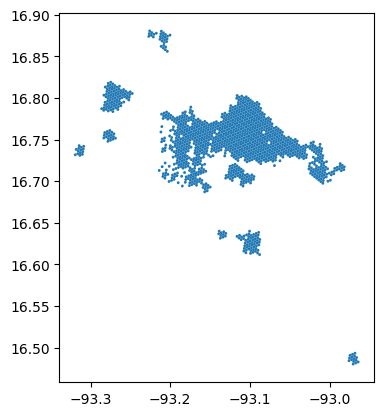

In [3]:
# Select source (res9)
hex_pop = gpd.GeoDataFrame()
hex_schema = 'censo'
hex_folder = 'hex_censo_mza_2020_res9'

# Downloads hexagons within 'city'
query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"metropolis\" LIKE \'{city}\'"
hex_pop = aup.gdf_from_query(query, geometry_col='geometry')

print(hex_pop.shape)
hex_pop.head(2)
hex_pop.plot()

### Donwload nodes

Download nodes based on metropolis name.

In [4]:
#Folder names from database
nodes_schema = 'prox_analysis'
nodes_table = 'nodes_proximity_2020'

query = f"SELECT * FROM {nodes_schema}.{nodes_table} WHERE \"metropolis\" LIKE \'{city}\'"
nodes = aup.gdf_from_query(query, geometry_col='geometry')

print(nodes.shape)
nodes.head(2)

Exception during reset or similar
Traceback (most recent call last):
  File "/usr/local/python/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 991, in _finalize_fairy
    fairy._reset(
  File "/usr/local/python/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 1440, in _reset
    pool._dialect.do_rollback(self)
  File "/usr/local/python/lib/python3.10/site-packages/sqlalchemy/engine/default.py", line 657, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: SSL SYSCALL error: EOF detected



(1561805, 7)


,osmid,x,y,geometry,time,amenity,metropolis
0,320247763,-93.117875,16.735117,POINT (-93.11787 16.73512),5.591923,sip_cancha,Tuxtla
1,287409831,-93.282851,16.768713,POINT (-93.28285 16.76871),67.788943,sip_cancha,Tuxtla


### Download hexagons res8 and res9

In [5]:
res = 8
folder = 'hexgrid'
table = f'hexgrid_{res}_city'

query = f"SELECT * FROM {folder}.{table} WHERE \"metropolis\" LIKE \'{city}\'"
hex_res_8 = aup.gdf_from_query(query, geometry_col='geometry')
hex_res_8 = hex_res_8[[f'hex_id_{res}','geometry','metropolis']]
print(hex_res_8.shape)
hex_res_8.head(2)

(2700, 3)


,hex_id_8,geometry,metropolis
0,886d23ca8bfffff,"POLYGON ((-93.38514 16.88833, -93.38502 16.883...",Tuxtla
1,886d23cf49fffff,"POLYGON ((-93.34441 16.86303, -93.34452 16.868...",Tuxtla


In [6]:
res = 9
folder = 'hexgrid'
table = f'hexgrid_{res}_city'

query = f"SELECT * FROM {folder}.{table} WHERE \"metropolis\" LIKE \'{city}\'"
hex_res_9 = aup.gdf_from_query(query, geometry_col='geometry')
hex_res_9 = hex_res_9[[f'hex_id_{res}','geometry','metropolis']]
print(hex_res_9.shape)
hex_res_9.head(2)

(18868, 3)


,hex_id_9,geometry,metropolis
0,896d23caa27ffff,"POLYGON ((-93.40632 16.86782, -93.40565 16.866...",Tuxtla
1,896d23caaa3ffff,"POLYGON ((-93.40340 16.87908, -93.40464 16.877...",Tuxtla


## Data treatment

### Remove duplicate nodes

Creates nodes with geometry and without duplicates to store times in following loop.

In [9]:
nodes_analysis = nodes.drop_duplicates(subset='osmid', keep="last")[['osmid','geometry','metropolis']].copy()
print(nodes_analysis.shape)
nodes_analysis.head(2)

(36941, 3)


,osmid,geometry,metropolis
145521,280081381,POINT (-93.41519 16.87585),Tuxtla
156299,3526953667,POINT (-93.20250 16.49486),Tuxtla


### Rows to columns

Organize data by nodes by changing (time to ammenites) from rows (1 column with amenity name + 1 column with time data) to columns (1 column with time data named after its amenity)

In [10]:
for amenidad in list(nodes.amenity.unique()):
    nodes_tmp = nodes.loc[nodes.amenity == amenidad,['osmid','time']]
    nodes_tmp = nodes_tmp.rename(columns={'time':amenidad})
    # Search for amenities that aren't present in the city (with all values marked as 0) and change them to NaN
    if nodes_tmp[amenidad].mean() == 0:
        nodes_tmp[amenidad] = np.nan
    nodes_analysis = nodes_analysis.merge(nodes_tmp, on='osmid')
    
print(nodes_analysis.shape)
nodes_analysis.head(2)

(36275, 46)


,osmid,geometry,metropolis,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,sip_teatro,clues_primer_nivel,clues_segundo_nivel,...,denue_centro_cultural,denue_parque_natural,denue_papelerias,denue_libros,denue_revistas_periodicos,denue_ferreteria_tlapaleria,denue_art_limpieza,denue_pintura,denue_peluqueria,sip_centro_admin
0,287409831,POINT (-93.28285 16.76871),Tuxtla,67.788943,NaN,70.357975,69.145039,NaN,68.827742,70.603851,...,66.961602,NaN,47.006678,243.003155,257.081292,51.177865,70.391566,68.669596,51.177865,72.058070
1,325137459,POINT (-92.98533 16.60503),Tuxtla,178.080303,NaN,24.922743,298.534441,NaN,62.643512,298.534441,...,293.201370,NaN,277.048981,376.348749,372.874935,267.251824,280.125845,294.927013,271.789753,24.922743


## 15 minute city analysis

### Parameters definitions

In [12]:
#{Eje (e):
#         {Tipología/tipo (t):
#                       {Amenidad(a))}}}

idx_15_min = {'Escuelas':{'Preescolar':['denue_preescolar'],
                         'Primaria':['denue_primaria'],
                         'Secundaria':['denue_secundaria']},
             'Servicios comunitarios':{'Salud':['clues_primer_nivel'],
                                      'Guarderías':['denue_guarderias'],
                                      'Asistencia social':['denue_dif']},
              'Comercio':{'Alimentos':['denue_supermercado','denue_abarrotes',
                                    'denue_carnicerias','sip_mercado'],
                         'Personal':['denue_peluqueria'],
                          'Farmacias':['denue_farmacias'],
                         'Hogar':['denue_ferreteria_tlapaleria','denue_art_limpieza'],
                         'Complementarios':['denue_ropa','denue_calzado','denue_muebles',
                                           'denue_lavanderia','denue_revistas_periodicos',
                                           'denue_pintura']},
              'Entretenimiento':{'Social':['denue_restaurante_insitu','denue_restaurante_llevar',
                                          'denue_bares','denue_cafe'],
                                'Actividad física':['sip_cancha','sip_unidad_deportiva',
                                                   'sip_espacio_publico','denue_parque_natural'],
                                'Cultural':['denue_cines','denue_museos']} 
             }


#If weight is less than number of amenities, the algorith chooses the minimum time to amenity. Else (if equall or greater), chooses max time.
wegiht_idx = {'Escuelas':{'Preescolar':1,
                        'Primaria':1,
                        'Secundaria':1},
            'Servicios comunitarios':{'Salud':1,
                                    'Guarderías':1,
                                    'Asistencia social':1},
            'Comercio':{'Alimentos':1,
                        'Personal':1,
                        'Farmacias':1,
                        'Hogar':1,
                        'Complementarios':1},
            'Entretenimiento':{'Social':4,
                                'Actividad física':1,
                                'Cultural':1}
            }

In [13]:
amenities = []

# gather amenities for analysis
for eje in idx_15_min.keys():
    for tipo in idx_15_min[eje].values():
        for amenity in tipo:
            amenities.append(amenity)

amenities =  str(tuple(amenities))
amenities

"('denue_preescolar', 'denue_primaria', 'denue_secundaria', 'clues_primer_nivel', 'denue_guarderias', 'denue_dif', 'denue_supermercado', 'denue_abarrotes', 'denue_carnicerias', 'sip_mercado', 'denue_peluqueria', 'denue_farmacias', 'denue_ferreteria_tlapaleria', 'denue_art_limpieza', 'denue_ropa', 'denue_calzado', 'denue_muebles', 'denue_lavanderia', 'denue_revistas_periodicos', 'denue_pintura', 'denue_restaurante_insitu', 'denue_restaurante_llevar', 'denue_bares', 'denue_cafe', 'sip_cancha', 'sip_unidad_deportiva', 'sip_espacio_publico', 'denue_parque_natural', 'denue_cines', 'denue_museos')"

## Max time calculation

In [14]:
nodes_analysis.head(2) #Para tenerlo cerca y revisarlo

,osmid,geometry,metropolis,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,sip_teatro,clues_primer_nivel,clues_segundo_nivel,...,denue_centro_cultural,denue_parque_natural,denue_papelerias,denue_libros,denue_revistas_periodicos,denue_ferreteria_tlapaleria,denue_art_limpieza,denue_pintura,denue_peluqueria,sip_centro_admin
0,287409831,POINT (-93.28285 16.76871),Tuxtla,67.788943,NaN,70.357975,69.145039,NaN,68.827742,70.603851,...,66.961602,NaN,47.006678,243.003155,257.081292,51.177865,70.391566,68.669596,51.177865,72.058070
1,325137459,POINT (-92.98533 16.60503),Tuxtla,178.080303,NaN,24.922743,298.534441,NaN,62.643512,298.534441,...,293.201370,NaN,277.048981,376.348749,372.874935,267.251824,280.125845,294.927013,271.789753,24.922743


In [15]:
# time by ammenity

column_max_ejes = [] # list with ejes index column names
column_max_all = [] # list with all max index column names


#Goes through dictionary:
for e in idx_15_min.keys():
    
    #Appends to 3 lists currently examined eje
    column_max_ejes.append('max_'+ e.lower())
    column_max_all.append('max_'+ e.lower())
    column_max_types = [] # list with tipologías/tipos in current eje
    
    for t in idx_15_min[e].keys():
        
        #Appends to 2 lists currently examined tipología/tipo
        column_max_types.append('max_'+ t.lower())
        column_max_all.append('max_'+ t.lower())

        #Calculates time from currently examined amenities in tipología/tipo:
        if wegiht_idx[e][t] < len(idx_15_min[e][t]): #If weight is less than number of amenities, choose minimum time to amenity. Else, choose max time.
            nodes_analysis['max_'+ t.lower()] = nodes_analysis[idx_15_min[e][t]].min(axis=1)
        else:
            nodes_analysis['max_'+ t.lower()] = nodes_analysis[idx_15_min[e][t]].max(axis=1)
    
    #Asignar max_eje el tiempo máximo de todas los tipos de amenities
    nodes_analysis['max_'+ e.lower()] = nodes_analysis[column_max_types].max(axis=1) 

index_column = 'max_idx_15_min' # column name for 15 minute index data

#Add to column_max_all list the attribute 'max_idx_15_min'
column_max_all.append(index_column)

#Asignar a max_idx_15_min el maximo tiempo de todos los ejes
nodes_analysis[index_column] = nodes_analysis[column_max_ejes].max(axis=1) 

In [16]:
nodes_analysis.head(2)

,osmid,geometry,metropolis,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,sip_teatro,clues_primer_nivel,clues_segundo_nivel,...,max_personal,max_farmacias,max_hogar,max_complementarios,max_comercio,max_social,max_actividad física,max_cultural,max_entretenimiento,max_idx_15_min
0,287409831,POINT (-93.28285 16.76871),Tuxtla,67.788943,NaN,70.357975,69.145039,NaN,68.827742,70.603851,...,51.177865,55.366849,51.177865,54.242097,55.366849,47.006678,67.788943,261.482562,261.482562,261.482562
1,325137459,POINT (-92.98533 16.60503),Tuxtla,178.080303,NaN,24.922743,298.534441,NaN,62.643512,298.534441,...,271.789753,288.317745,267.251824,273.161760,288.317745,288.635370,24.922743,339.409487,339.409487,339.409487


In [17]:
#Add to column_max_all list the attributes 'osmid' and 'geometry' to filter nodes_analysis with the column_max_all list.
column_max_all.append('osmid')
column_max_all.append('geometry')
nodes_analysis_filter = nodes_analysis[column_max_all].copy()
nodes_analysis_filter.head(4)

,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,max_comercio,max_alimentos,...,max_farmacias,max_hogar,max_complementarios,max_entretenimiento,max_social,max_actividad física,max_cultural,max_idx_15_min,osmid,geometry
0,60.299774,53.282257,56.814611,60.299774,69.145039,68.827742,58.890007,69.145039,55.366849,44.656545,...,55.366849,51.177865,54.242097,261.482562,47.006678,67.788943,261.482562,261.482562,287409831,POINT (-93.28285 16.76871)
1,288.635370,280.540963,285.772262,288.635370,300.064907,62.643512,295.936184,300.064907,288.317745,267.251824,...,288.317745,267.251824,273.161760,339.409487,288.635370,24.922743,339.409487,339.409487,325137459,POINT (-92.98533 16.60503)
2,288.240780,280.146373,285.377672,288.240780,299.670317,62.248922,295.541594,299.670317,287.923155,266.857234,...,287.923155,266.857234,272.767170,339.014897,288.240780,24.528153,339.014897,339.014897,325137460,POINT (-92.98551 16.60519)
3,287.563365,279.468958,284.700257,287.563365,298.992902,61.571507,294.864179,298.992902,287.245740,266.179819,...,287.245740,266.179819,272.089755,338.337482,287.563365,23.850738,338.337482,338.337482,325137461,POINT (-92.98590 16.60537)


## Group times by hexagons

In [20]:
# group data by hex
res = 9
hex_tmp = hex_pop[['hex_id_9','geometry']]
hex_res_9_idx = aup.group_by_hex_mean(nodes_analysis_filter, hex_tmp, res, index_column)
hex_res_9_idx = hex_res_9_idx.loc[hex_res_9_idx[index_column]>0].copy()

# Review result
hex_res_9_idx.head(2)

,hex_id_9,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,...,max_alimentos,max_personal,max_farmacias,max_hogar,max_complementarios,max_entretenimiento,max_social,max_actividad física,max_cultural,max_idx_15_min
0,896d231a357ffff,"POLYGON ((-93.17697 16.71641, -93.17573 16.717...",37.146151,11.108051,27.144151,37.146151,69.231307,64.878943,69.231307,39.639074,...,7.114693,23.456540,21.446897,15.165851,21.968129,102.553431,16.612789,29.819731,102.553431,102.553431
1,896d23c4b73ffff,"POLYGON ((-93.14499 16.76534, -93.14375 16.766...",35.024185,14.641448,16.276428,35.024185,18.235185,16.742294,18.134972,18.129974,...,5.022610,9.000345,22.280780,14.989355,10.249885,20.969521,20.854691,4.428659,20.179557,35.024185


<Axes: >

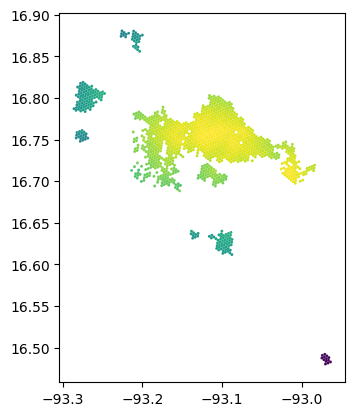

In [24]:
hex_res_9_idx.plot('max_idx_15_min',cmap = 'viridis_r')

### Calculate max times by hexagon

In [26]:
# recalculates max time to each eje from max times to calculated amenities and max_idx_15_min from max eje

column_max_ejes = [] # list with ejes index column names

for e in idx_15_min.keys():
    
    column_max_ejes.append('max_'+ e.lower())
    column_max_types = [] # list with tipologías/tipos in current eje
    
    for t in idx_15_min[e].keys():
        
        column_max_types.append('max_'+ t.lower())
        
    hex_res_9_idx['max_'+ e.lower()] = hex_res_9_idx[column_max_types].max(axis=1)

hex_res_9_idx[index_column] = hex_res_9_idx[column_max_ejes].max(axis=1)

#Add to column_max_all list the attribute 'max_idx_15_min'
column_max_ejes.append(index_column)

#Review results:
hex_res_9_idx[column_max_ejes].head(2)

,max_escuelas,max_servicios comunitarios,max_comercio,max_entretenimiento,max_idx_15_min
0,37.146151,69.231307,23.45654,102.553431,102.553431
1,35.024185,18.134972,22.28078,20.854691,35.024185


## Save to Database before adding population data

In [29]:
if save_todb:
    aup.gdf_to_db_slow(hex_res_9_idx,"15minanalysis_hexres9_{}".format(city), 'prox_analysis', if_exists='replace')